### Solving the pendulum equation using the Runge Kutta method

_Author: Jorge Vera Moreno_

The pendulum experiences a torque
$$
  \tau_p = MgL \sin(\theta),
$$

and we also know that the torque of a rigid body is  given by

$$
  \tau = I \alpha,
$$

where $I$ is the moment of inertia and $\alpha$ the angular
acceleration. These are given by

$$
  I = ML^2 \qquad \text{and} \qquad  \alpha = \frac{d\omega}{dt} = \frac{d^2\theta}{dt^2},
$$

where $\omega$ is the angular velocity.
We can then rewrite the equation for the torque in terms of the
angular position of the pendulum (note that a minus sign appears because the torque and the angle are measured in opposite directions):

$$
  \tau_p = - I \frac{d^2\theta}{dt^2}.
$$

Substituting and rearranging gives us the equation of motion for
the pendulum:

$$
  \frac{d^2\theta}{dt^2} = - \frac{MgL}{I} \sin(\theta) = - \frac{g}{L}
  \sin(\theta),
$$

 which tells us that the bob accelerates towards the rest point at $\theta = 0$, and that the acceleration is dependent on the sine of the angle of displacement.

 We can separate out into two first-order equations, where the two variables are now the angle $\theta$ and the angular velocity $\omega$.

$$ \frac{d \theta}{d t} = \omega$$

$$ \frac{d \omega}{dt} = -\frac{g}{L}\sin\theta $$

This set of ODEs can be solved using the Runge Kutta method. Here we will use the fourth-order Runge Kutta method, considered to have the most useful combination of simplicity and accuracy, and is the most widely used method to solve differential equations numerically.

First, we will import NumPy and Matplotlib:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We're going to write a python function to represent our equation

$$ \frac{d \mathbf{r}}{dt} = {\mathbf f}({\mathbf r},t),$$

Whereas before our function depended on $x(t)$ and $t$, now it depends on a vector ${\mathbf r}(t)$ and $t$:

In [2]:
def f(r,t): 
    '''Definition of the vector function to be solved
    for particle fixed to a pivot subject to gravitational acceleration.
    Inputs are r (a vector) and t'''
    theta = r[0] # first element of r represents the angular position of the particle
    omega = r[1] # second element of r represents the angular velocity of the particle
    dthetadt = omega # Derivative of ang. position wrt to time is angular velocity
    domegadt = -g*np.sin(theta)/L # Derivative of ang. velocity wrt time is -g*sin(theta)/*L
    return np.array([dthetadt,domegadt]) # convert dthetadt and domegadt to an array form

In [3]:
def RungeKutta2d(funct,r,tpoints):
    '''Fourth-order Runge-Kutta rewritten for two simultaneous equations
    Inputs: r: 2-component array , first component is ang. position, second ang. velocity
            tpoints: array of time values.
    Outputs: [xpoints, ypoints]: solutions for theta(t) and omega(t), numpy arrays of same length as tpoints'''
    xpoints = [] # initialise empty arrays
    ypoints = []
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        # The following is the same as before, with x->r
        k1 = h*funct(r,t) 
        k2 = h*funct(r+0.5*k1, t+0.5*h)
        k3 = h*funct(r+0.5*k2, t+0.5*h)
        k4 = h*funct(r+k3, t+h)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    return np.array([xpoints, ypoints]) # convert output to numpy array with 2 rows and N columns

When we call the 'RungeKutta2d' function, it returns an array. The first row contains the results for $\theta(t)$ and the second row $\omega(t)$. Now we can go ahead and plot these:

ERROR! Session/line number was not unique in database. History logging moved to new session 392


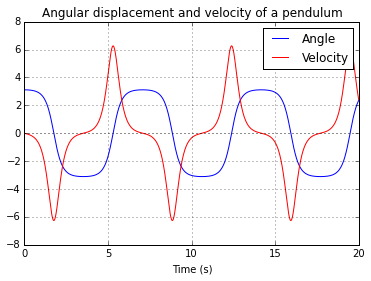

In [7]:
g = 9.8 # gravitational acceleration in m/s^2
L=1 #length of string

tstart = 0.0
tend = 20.0 # solve for a period of 20 seconds.
N = 1000 # number of points for Runge-Kutta
h = (tend - tstart)/N #step size

tpoints = np.arange(tstart, tend, h) #time domain

# define the initial conditions
initialTheta = 0.99*np.pi # initial ang. position, in radians
intialOmega = 0 # initial ang. velocity in rad/s.
r = np.array([initialTheta, intialOmega])

rsol = RungeKutta2d(f,r,tpoints) # this will be an array of the x and y solutions

plt.plot(tpoints,rsol[0],label=r"Angle")
plt.plot(tpoints,rsol[1],'r',label=r"Velocity")
plt.legend()
plt.axhline(c="k",ls=":", lw=0.5) # draw black dotted line at y (or v_y) = 0
plt.xlabel("Time (s)");
plt.title("Angular displacement and velocity of a pendulum")
plt.grid()

With the $\sin \theta \approx \theta$ approximation, the angular velocity for large angles is lower (i.e. the real pendulum takes a longer time to fall when approaching $90^{\circ}$). The approximation also leads to think that the angular velocity has the same functional form as angular displacement, but out of phase and with different amplitude, but here the angular velocity is a completely different function, with much sharper maxima.

We can now try to solve the damped pendulum equation:
$$
\frac{d \omega}{dt}  = -\frac{g}{L}\sin(\theta)  - \frac{c \omega}{M L^2}
$$

We proceed as before, definining the 'damped' function to our equation. We will use $c=0.1$ and $M=0.1\: \mathbf{kg}$

In [5]:
def damped(r,t): 
    '''Definition of the vector function to be solved
    for particle fixed to a pivot subject to gravitational acceleration (with damping)
    Inputs are r (a vector) and t'''
    theta = r[0] # first element of r represents the angular position of the particle
    omega = r[1] # second element of r represents the angular velocity of the particle
    dthetadt = omega # Derivative of ang. position wrt to time is angular velocity
    domegadt = -g*np.sin(theta)/L -c*omega/(M*L**2) # Derivative of ang. velocity wrt time is -g*sin(theta)/*L
    return np.array([dthetadt,domegadt]) # convert dthetadt and domegadt to an array form

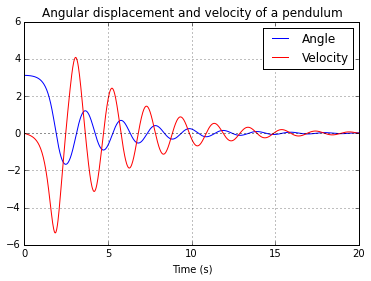

In [9]:
c=0.05 #damping coefficient
M=0.1 #mass of the bob
rsol_d = RungeKutta2d(damped,r,tpoints) # this will be an array of the x and y solutions
plt.plot(tpoints,rsol_d[0],label=r"Angle")
plt.plot(tpoints,rsol_d[1],'r',label=r"Velocity")
plt.legend()
plt.axhline(c="k",ls=":", lw=0.5) # draw black dotted line at y (or v_y) = 0
plt.xlabel("Time (s)");
plt.title("Angular displacement and velocity of a pendulum")
plt.grid()

We can now use our solutions to represent both pendulums in a Vpython animation. In the following animation, the pendulum with the red rod is undamped, whereas the one with the green rod is damped. By increasing the value of $c$, the damped pendulum can go from underdamped to critical damping, and eventually overdamped. In addition, the angular frequency of the damped pendulum also depends on the mass of the bob, while that isn't the case for the undamped one. In any case, the damped pendulum eventually stops oscillating whereas the undamped goes on:

In [8]:
from vpython import sphere, cylinder, color, display, rate, vector

### Animate the solution

# first set up the objects:
pivot = vector(0,0,0) # pivot point at centre of display

### For the undamped system:
# the rigid rod connecting the bob to the pivot point...
rod = cylinder(pos=pivot, axis = vector(L*np.sin(initialTheta),-L*np.cos(initialTheta),0), 
                      radius = 0.01, color=color.red)
# ...and the bob.
bob = sphere(pos=vector(L*np.sin(initialTheta),-L*np.cos(initialTheta),0), 
                      radius = 0.1, color=color.blue)


### For the damped system:
# the rigid rod connecting the bob to the pivot point...
rod_d = cylinder(pos=pivot, axis = vector(L*np.sin(initialTheta),-L*np.cos(initialTheta),0), 
                      radius = 0.01, color=color.green, opacity = 0.5)
# ...and the bob.
bob_d = sphere(pos=vector(L*np.sin(initialTheta),-L*np.cos(initialTheta),0), 
                      radius = 0.1, color=color.cyan, opacity = 0.5)

# Loop over the solution already calculated    
for i in range(0,N):
    
    ## undamped system:
    angle = rsol[0,i] 
    #  change the axis of the bob
    rod.axis = vector(L*np.sin(angle), -L*np.cos(angle),0)
    #update the position of the bob:
    bob.pos = vector(L*np.sin(angle),-L*np.cos(angle),0)
    
    ## damped system:
    angle_d = rsol_d[0,i]
    rod_d.axis = vector(L*np.sin(angle_d), -L*np.cos(angle_d),0)
    bob_d.pos = vector(L*np.sin(angle_d),-L*np.cos(angle_d),0)
    
    rate(50) # framerate

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>